In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from math import sqrt
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_colwidth',150)

In [34]:
dataset = pd.read_csv('tripadvisor_european_restaurants.csv')
dataset = dataset.applymap(lambda s:s.lower() if type(s) == str else s)
dataset.head(5)

C:\Users\daand\AppData\Local\Temp\ipykernel_18672\147539265.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('tripadvisor_european_restaurants.csv')


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,default_language,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,le 147,"[""europe"", ""france"", ""nouvelle-aquitaine"", ""haute-vienne"", ""saint-jouvent""]",france,nouvelle-aquitaine,haute-vienne,saint-jouvent,"10 maison neuve, 87510 saint-jouvent france",45.961674,1.169131,claimed,NaN,#1 of 2 restaurants in saint-jouvent,#1 of 2 places to eat in saint-jouvent,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, serves alcohol, accepts credit cards, table service",n,n,n,NaN,NaN,NaN,NaN,4.0,36.0,english,2.0,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,le saint jouvent,"[""europe"", ""france"", ""nouvelle-aquitaine"", ""haute-vienne"", ""saint-jouvent""]",france,nouvelle-aquitaine,haute-vienne,saint-jouvent,"16 place de l eglise, 87510 saint-jouvent france",45.957040,1.205480,unclaimed,NaN,#2 of 2 restaurants in saint-jouvent,#2 of 2 places to eat in saint-jouvent,cheap eats,€,NaN,NaN,NaN,NaN,NaN,n,n,n,NaN,NaN,NaN,NaN,4.0,5.0,all languages,5.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,au bout du pont,"[""europe"", ""france"", ""centre-val de loire"", ""berry"", ""indre"", ""rivarennes""]",france,centre-val de loire,berry,rivarennes,"2 rue des dames, 36800 rivarennes france",46.635895,1.386133,claimed,NaN,#1 of 1 restaurant in rivarennes,#1 of 1 places to eat in rivarennes,"cheap eats, french, european",€,NaN,"dinner, lunch, drinks","french, european",NaN,"reservations, seating, table service, wheelchair accessible",n,n,n,NaN,NaN,NaN,NaN,5.0,13.0,english,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,le relais de naiade,"[""europe"", ""france"", ""nouvelle-aquitaine"", ""correze"", ""lacelle""]",france,nouvelle-aquitaine,correze,lacelle,"9 avenue porte de la correze 19170, 19170 lacelle france",45.642610,1.824460,claimed,NaN,#1 of 1 restaurant in lacelle,#1 of 1 places to eat in lacelle,"cheap eats, french",€,NaN,"lunch, dinner",french,NaN,"reservations, seating, serves alcohol, table service, wheelchair accessible",n,n,n,NaN,NaN,NaN,NaN,4.0,34.0,english,1.0,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,relais du montseigne,"[""europe"", ""france"", ""occitanie"", ""aveyron"", ""saint-laurent-de-levezou""]",france,occitanie,aveyron,saint-laurent-de-levezou,"route du montseigne, 12620 saint-laurent-de-levezou france",44.208860,2.960470,unclaimed,NaN,#1 of 1 restaurant in saint-laurent-de-levezou,#1 of 1 places to eat in saint-laurent-de-levezou,"mid-range, french",€€-€€€,NaN,"lunch, dinner",french,NaN,"reservations, seating, wheelchair accessible, table service",n,n,n,NaN,NaN,NaN,NaN,4.5,11.0,all languages,11.0,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

# 1)
Geef een random restaurant in een regio (land, provincie)

In [51]:
country = "belgium"
region = "flanders"
df = dataset[dataset['country'].str.contains(country) & dataset['region'].str.contains(region)].iloc[[random.randrange(len(df.index))]]
#df = df.iloc[[random.randrange(len(df.index))]]
df.iloc[0]

restaurant_link                                                                     g1006202-d11044724
restaurant_name                                                                              de potter
original_location                    ["europe", "belgium", "flanders", "limburg province", "neerpelt"]
country                                                                                        belgium
region                                                                                        flanders
province                                                                              limburg province
city                                                                                               NaN
address                                                           marktplein 17, neerpelt 3910 belgium
latitude                                                                                      51.22915
longitude                                                                

# 2)
Zoek naar restaurants op naam (naam)

In [39]:
name = "le 147"
df = dataset[dataset['restaurant_name'].str.contains(name)].iloc[0]
df

restaurant_link                                                                                                    g10001637-d10002227
restaurant_name                                                                                                                 le 147
original_location                                          ["europe", "france", "nouvelle-aquitaine", "haute-vienne", "saint-jouvent"]
country                                                                                                                         france
region                                                                                                              nouvelle-aquitaine
province                                                                                                                  haute-vienne
city                                                                                                                     saint-jouvent
address                                                

# 3)
Geef een random restaurant in een bepaalde radius (lat, long, radius)

In [52]:
import requests
import json

send_url = "http://api.ipstack.com/check?access_key=cdebf0737bdfa46c15cdfa66566b7223"
geo_req = requests.get(send_url)
geo_json = json.loads(geo_req.text)
lat = geo_json['latitude']
long = geo_json['longitude']
country = geo_json['country_name']

radius = 0.1
restaurants = []
index = 0

df = dataset[dataset['country'].str.contains(country.lower())]

for i, r in df.iterrows():
    a = lat - float(r['latitude'])
    b = long - float(r['longitude'])
    c = sqrt(a * a  +  b * b)
    if c<radius:
        restaurants.append(index)
    index = index + 1

df = df.iloc[[restaurants[random.randrange(len(restaurants))]]].iloc[0]
df

restaurant_link                                                                                                                                                           g188637-d6736051
restaurant_name                                                                                                                                                                   m-eatery
original_location                                                                                                        ["europe", "belgium", "flanders", "antwerp province", "mechelen"]
country                                                                                                                                                                            belgium
region                                                                                                                                                                            flanders
province                                                         

# 4)
Zoeken naar statistische data van restaurants per land (land) -> avg rating, hoeveel restaurants

In [14]:
countrys = dataset['country'].unique().tolist()
stats = []
for c in countrys:
    country = []
    country.append(c)
    df = dataset[dataset['country'] == c]
    total_restaurants = df['country'].count()
    country.append(total_restaurants)
    avg_rating = df['avg_rating'].mean()
    country.append(round(avg_rating, 2))
    stats.append(country)

print(stats)


[['france', 155288, 4.02], ['the netherlands', 29792, 4.07], ['germany', 115333, 4.06], ['austria', 20487, 4.14], ['spain', 157479, 3.96], ['england', 144681, 4.0], ['northern ireland', 3634, 4.0], ['scotland', 14215, 4.05], ['wales', 9134, 4.06], ['italy', 224763, 4.04], ['ireland', 11203, 4.14], ['poland', 24698, 4.11], ['sweden', 18555, 3.86], ['belgium', 23711, 4.0], ['greece', 33763, 4.33], ['croatia', 8375, 4.14], ['portugal', 32592, 4.15], ['slovakia', 4251, 4.12], ['czech republic', 14844, 4.04], ['hungary', 7431, 4.15], ['finland', 7372, 3.94], ['denmark', 9485, 3.93], ['bulgaria', 4469, 4.2], ['romania', 7842, 4.1]]


# 5)
Aantal restaurants in land per regio & provincie (land) -> grafiek

[Text(0.5, 1.0, 'Countplot per province')]

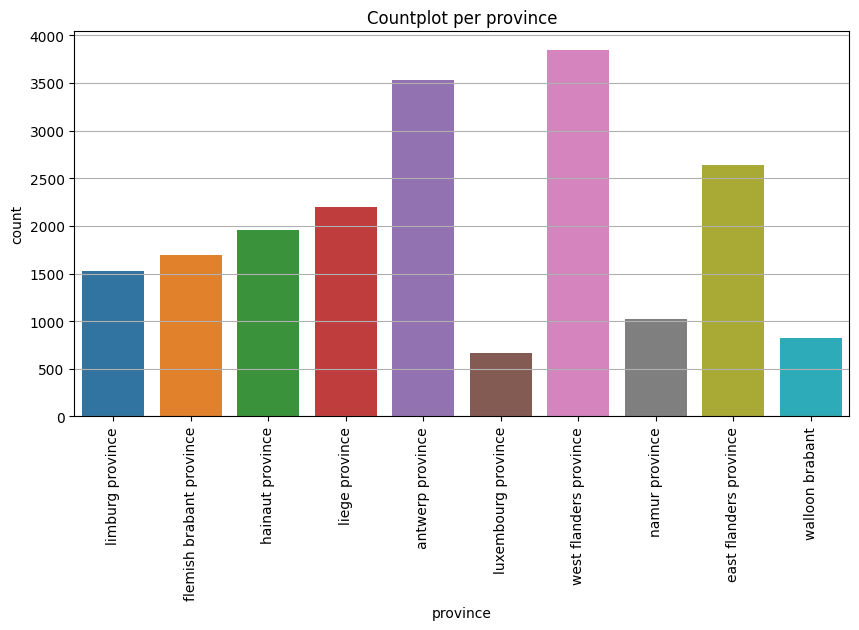

In [51]:
country = "belgium"
df = dataset[dataset['country'].str.contains(country)]
plt.figure(figsize=(10,5))
plt.grid()
plt.xticks(rotation=90)
sns.countplot(data=df, x=df['province']).set(title='Countplot per province')


In [16]:
import geocoder
g = geocoder.ip('me')
print(g.latlng)


[51.0257, 4.4776]


In [30]:
import requests
import json

send_url = "http://api.ipstack.com/check?access_key=cdebf0737bdfa46c15cdfa66566b7223"
geo_req = requests.get(send_url)
geo_json = json.loads(geo_req.text)
latitude = geo_json['latitude']
longitude = geo_json['longitude']
country = geo_json['country_name']
print(latitude, longitude, country)

51.0289192199707 4.47806978225708 Belgium
